In [8]:
import astropy.io.fits as pf
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp

%matplotlib inline

In [2]:
def get_spectrum_wavelength(file):
    spec_data = pf.getdata(file)
    spec_header = pf.getheader(file)
    
    wl_i = spec_header['CRVAL1'] # Coordinate value of position in degrees, specified in CRPIX.
    wl_step = spec_header['CDELT1'] # Increment-per-pixel of axis n, in degrees
    wavelength = np.arange(spec_data.size)*wl_step+wl_i
    
    return spec_data, wavelength

In [3]:
def normalize_spectrum(spec_data, wavelength, step = 0.05):
    wl_max = wavelength.max()
    wl_min = wavelength.min()
    flx_max = spec_data.max()
    flx_min = spec_data.min()
    
    interpolation_function = interp.interp1d(wavelength, spec_data)
    
    new_wavelength = np.arange(wl_min, wl_max, step)
    new_flux = np.arange(flx_min, flx_max)
    new_flux = interpolation_function(new_wavelength)
    
    return new_wavelength, new_flux

In [10]:
def plot_spectrum(new_wavelength, new_flux):
    plt.rcParams['figure.figsize'] = [12, 8]
    plt.plot(new_wavelength, new_flux, '-')
    plt.xlabel(r"Wavelength ($\mathrm{\AA}$)")
    plt.ylabel(r"Flux")
    plt.show()

In [11]:
def plot_normalized_spectrum(file):
    spec_data, wavelength = get_spectrum_wavelength(file)
    new_wl, new_flux = normalize_spectrum(spec_data, wavelength)
    plot_spectrum(new_wl, new_flux)

## HD110379

In [12]:
obs_HD110379 = 'spectra/HD110379/obs_HD110379_ordens_finalglue.fits'
tel_HD110379 = 'spectra/HD110379/tellstar_qvir_ordens_finalglue.fits'

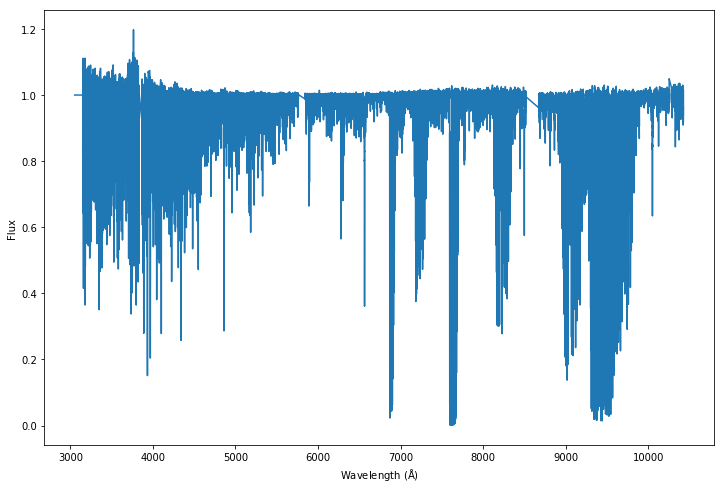

In [13]:
plot_normalized_spectrum(obs_HD110379)

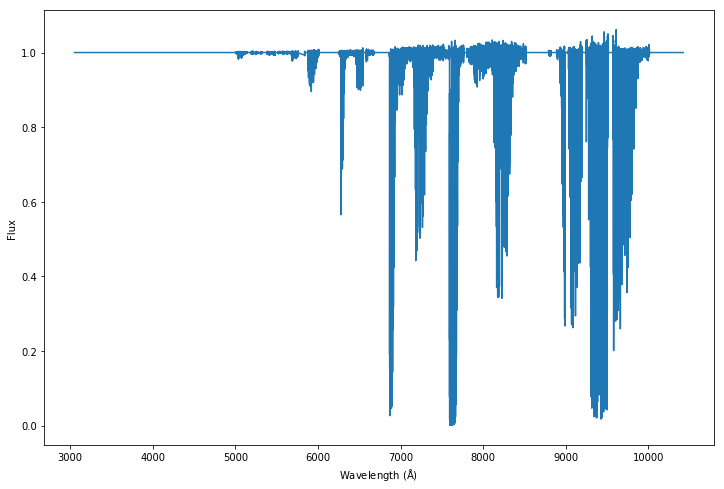

In [14]:
plot_normalized_spectrum(tel_HD110379)

## HD186791